# DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

## Import the Data
The data is the European Social Survey (ESS) for over 30 countries. It's three aims are to:
    1. Monitor and interpret changing public attitudes and values within Europe and investigate how they interact with Europe's  changing institutions.
    2. To advance and consolidate improved methods of cross-national survey measurement in Europe
    3. Develop a series of European social indicators including attitudinal indicators

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


# Model 1: Gradient Boosting Model
The target variable that we are trying to model is whether a person has a partner or not. The features are all the other variables except for 'idno', which is the users ID number. The results of this model was surprisingly pretty good considering that no adjustments have been made to the data. According to the model, the most important features to whether someone has a partner or not is their age, happiness level, and social activity. Additionally, it is noted that there are 5000 people without a partner and 3000 people with a partner. 

In [3]:
# define outcome and predictors
# Set our outcome to 0 and 1
Y = df['partner'] -1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

from sklearn.model_selection import train_test_split

# Create trainging and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1, random_state=1)

# Make 500 iterations, use 2-deep trees, and set our loss function
params = {'n_estimators': 500,
         'max_depth': 2,
         'loss': 'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, Y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

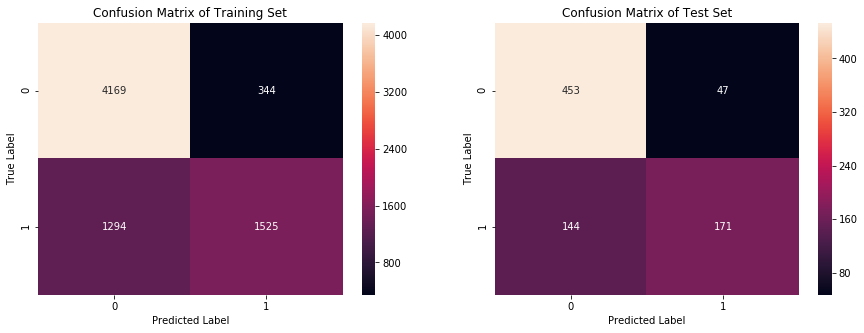

Accuracy Score of Training Set: 0.776595744680851
Accuracy Score of Test Set: 0.7656441717791411


In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# create heatmap of confusion matrix
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_train, predict_train), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(Y_test, predict_test), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Test Set')

plt.show()

# Print Accuracy Score
print('Accuracy Score of Training Set: {}'.format(accuracy_score(Y_train, predict_train)))
print('Accuracy Score of Test Set: {}'.format(accuracy_score(Y_test, predict_test)))

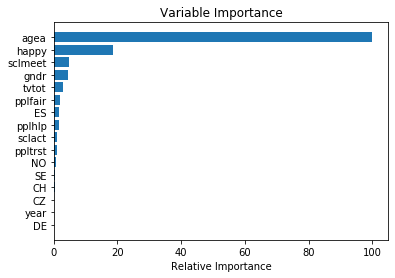

In [5]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Make importances relative to max importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

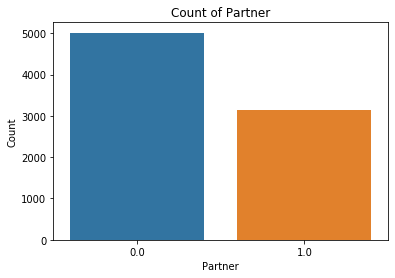

In [6]:
# Plot the counts of the target variable
sns.countplot(Y)
plt.title('Count of Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

# Improving the Model
There were a couple areas that the original model can be improved on. First, the features can be normalized this will give equal weight to all the features. Second, the minority group is people that have a partner. This can be fixed with oversampling the minority gorup. Lastly, we can adjust the parameters within the gradient boosting model to maximize the results. 

## Model 2: Normalize the Features
Surprisingly, there was only a slight improvement in this model in comparison to the first model. The key cahnge is that the training results were slightly better but the test results did not change. Note that overfittment could be an issue. 

In [7]:
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

from sklearn.preprocessing import normalize
X = normalize(X)

# Create trainging and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1, random_state=1)

# Make 500 iterations, use 2-deep trees, and set our loss function
params = {'n_estimators': 500,
         'max_depth': 2,
         'loss': 'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, Y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

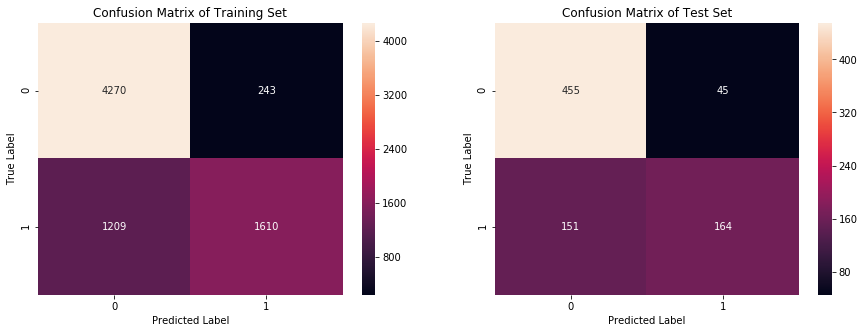

Accuracy Score of Training Set: 0.8019639934533551
Accuracy Score of Test Set: 0.7595092024539877


In [8]:
# create heatmap of confusion matrix
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_train, predict_train), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(Y_test, predict_test), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Test Set')

plt.show()

# Print Accuracy Score
print('Accuracy Score of Training Set: {}'.format(accuracy_score(Y_train, predict_train)))
print('Accuracy Score of Test Set: {}'.format(accuracy_score(Y_test, predict_test)))

# Model 3: Oversample with Partners
In this model the features were not normalized, and it performed in line with the prior models. Note that there is no overfittment issues with this model. 

In [9]:
single, partner = df['partner'].value_counts()

# Divide by Class
df_single = df[df['partner']==1]
df_partner = df[df['partner']==2]

# Increase the sample of partners
df_partner_over = df_partner.sample(single, replace=True)

# Append to Dataframe
df_over = pd.concat([df_single, df_partner_over], axis=0)

# Count of values
df_over['partner'].value_counts()

2.0    5013
1.0    5013
Name: partner, dtype: int64

In [10]:
# define outcome and predictors
# Set our outcome to 0 and 1
Y = df_over['partner'] -1
X = df_over.loc[:, ~df_over.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies
X = pd.concat([X, pd.get_dummies(df_over['cntry'])], axis=1)

# Create trainging and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1, random_state=1)

# Make 500 iterations, use 2-deep trees, and set our loss function
params = {'n_estimators': 500,
         'max_depth': 2,
         'loss': 'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, Y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

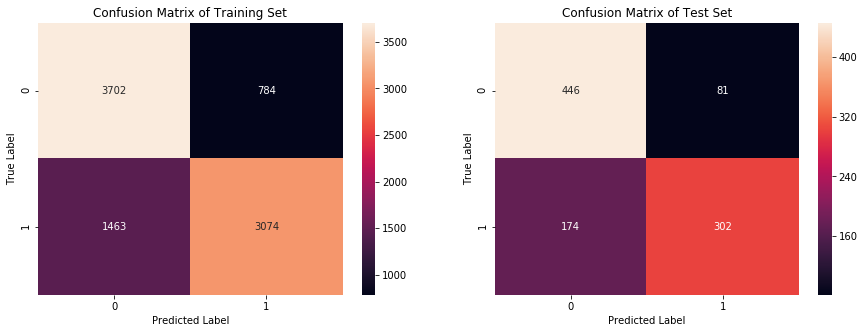

Accuracy Score of Training Set: 0.7509697439875873
Accuracy Score of Test Set: 0.7457627118644068


In [11]:
# create heatmap of confusion matrix
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_train, predict_train), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(Y_test, predict_test), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Test Set')

plt.show()

# Print Accuracy Score
print('Accuracy Score of Training Set: {}'.format(accuracy_score(Y_train, predict_train)))
print('Accuracy Score of Test Set: {}'.format(accuracy_score(Y_test, predict_test)))

# Model 4: Normalization with Oversampling
No noteable changes in this model from the previous models.

In [12]:
# define outcome and predictors
# Set our outcome to 0 and 1
Y = df_over['partner'] -1
X = df_over.loc[:, ~df_over.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies
X = pd.concat([X, pd.get_dummies(df_over['cntry'])], axis=1)

# Normalize the feature set
X = normalize(X)

# Create trainging and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1, random_state=1)

# Make 500 iterations, use 2-deep trees, and set our loss function
params = {'n_estimators': 500,
         'max_depth': 2,
         'loss': 'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, Y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

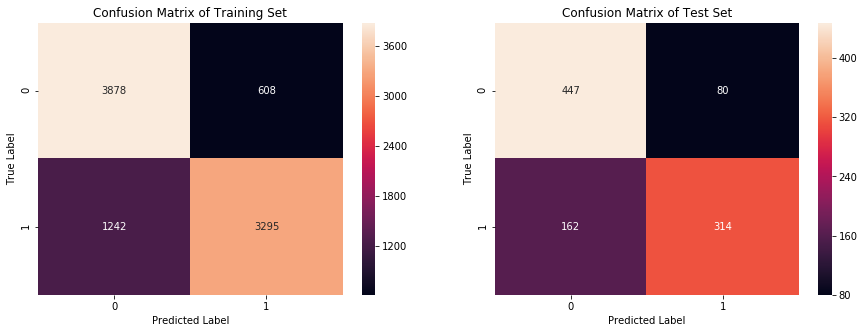

Accuracy Score of Training Set: 0.7949684140529757
Accuracy Score of Test Set: 0.7587238285144566


In [13]:
# create heatmap of confusion matrix
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_train, predict_train), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(Y_test, predict_test), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Test Set')

plt.show()

# Print Accuracy Score
print('Accuracy Score of Training Set: {}'.format(accuracy_score(Y_train, predict_train)))
print('Accuracy Score of Test Set: {}'.format(accuracy_score(Y_test, predict_test)))

# Hyperparameters
All the prior models were pretty lackluster. Lets loop through each of the parameters within the gradient boosting model to create the best model with the best accuracy. The first set of parameters choosen to optimize is the n_estimators and the max_depth. These parameters will drastically boost the accuracy of the model at the expense of overfitting. The next set of parameters, subsample and learning rates, will tackle and reduce the overfitment issues. 

In [14]:
# define outcome and predictors
# Set our outcome to 0 and 1
Y = df_over['partner'] -1
X = df_over.loc[:, ~df_over.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies
X = pd.concat([X, pd.get_dummies(df_over['cntry'])], axis=1)

# Normalize the feature set
X = normalize(X)

# Create trainging and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1, random_state=1)

In [15]:
import time

# Time the runtime of the decision tree
start_time = time.time()

# Variable for test accuracy
score = 0

# Iterate through range and replace n_estimators
for x in range(100, 1000, 100):
    params = {'n_estimators': x,
                'max_depth': 2,
                'loss': 'deviance',
                'subsample': 1,
                 'learning_rate': .1}
    
    # Initialize and fit the model
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, Y_train)

    predict_test = clf.predict(X_test)
    
    # Append best scores to variables
    if accuracy_score(Y_test, predict_test) > score:
        score = accuracy_score(Y_test, predict_test)
        best_est = x

# Print best results           
print('Test Accuracy: {} \nn_estimators: {}'.format(score, best_est))
print("\n--- %s seconds ---" % (time.time() - start_time))

Test Accuracy: 0.7846460618145563 
n_estimators: 900

--- 25.61856985092163 seconds ---


In [16]:
# Time the runtime of the decision tree
start_time = time.time()

# Iterate through range and replace max_depth
for x in range(1, 10, 1):
    params = {'n_estimators': best_est,
            'max_depth': x,
            'loss': 'deviance',
            'subsample': 1,
             'learning_rate': .1}
    
    # Initialize and fit the model
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, Y_train)

    predict_test = clf.predict(X_test)
    
    # Append best scores to variables
    if accuracy_score(Y_test, predict_test) > score:
        score = accuracy_score(Y_test, predict_test)
        best_depth = x

# Print best results           
print('Test Accuracy: {} \nn_estimators: {}'.format(score, best_est)+
     '\nmax_depth: {}'.format(best_depth))
print("\n--- %s seconds ---" % (time.time() - start_time))        

Test Accuracy: 0.8933200398803589 
n_estimators: 900
max_depth: 9

--- 154.85938620567322 seconds ---


In [17]:
# Time the runtime of the decision tree
start_time = time.time()

# Iterate through range and replace subsample
for x in range(25, 100, 5):
    x = x / 100
    params = {'n_estimators': best_est,
                'max_depth': best_depth,
                'loss': 'deviance',
                'subsample': x,
                 'learning_rate': .1}
    
    # Initialize and fit the model
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, Y_train)

    predict_test = clf.predict(X_test)
    
    # Append best scores to variables
    if accuracy_score(Y_test, predict_test) > score:
        score = accuracy_score(Y_test, predict_test)
        best_subsample = x

# Print best results        
print('Test Accuracy: {} \nn_estimators: {}'.format(score, best_est)+
     '\nsub_sample: {} \nmax_depth: {}'.format(best_subsample, best_depth))
print("\n--- %s seconds ---" % (time.time() - start_time))

Test Accuracy: 0.8963110667996012 
n_estimators: 900
sub_sample: 0.7 
max_depth: 9

--- 531.3749911785126 seconds ---


In [20]:
# Time the runtime of the decision tree
start_time = time.time()

best_learn = .1

# Iterate through range and replace learning_rate
for x in range(1, 20, 1):
    x = x / 100
    params = {'n_estimators': best_est,
            'max_depth': best_depth,
            'loss': 'deviance',
            'subsample': best_subsample,
             'learning_rate': x}
    
    # Initialize and fit the model
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, Y_train)

    predict_test = clf.predict(X_test)
    
    # Append best scores to variables
    if accuracy_score(Y_test, predict_test) > score:
        score = accuracy_score(Y_test, predict_test)
        best_learn = x

# Print best results           
print('Test Accuracy: {} \nn_estimators: {}'.format(score, best_est)+
     '\nsub_sample: {} \nmax_depth: {}'.format(best_subsample, best_depth)+
     '\nlearning_rate: {}'.format(best_learn))
print("\n--- %s seconds ---" % (time.time() - start_time))        

Test Accuracy: 0.8983050847457628 
n_estimators: 900
sub_sample: 0.7 
max_depth: 9
learning_rate: 0.13

--- 706.7811918258667 seconds ---


# Model 5: Hyperparameters with Oversampling and Normalization
This model was the most accurate model so far with 100% of the training set being classified correctly. Unfortunately, even with the best hyperparameters the data is overfitted with the accuracy of the test group being 89%. As noted in prior models the normalization of the data created a slight overfitment. With the large number of estimators and depth its easy to see how the model became even more overfitted. Lets try a hyperparameter model without the normalization to see if it improves the overfitment issue. 

In [21]:
# Hyperparameters
params = {'n_estimators': best_est,
                'max_depth': best_depth,
                'loss': 'deviance',
                'subsample': best_subsample,
                 'learning_rate': best_learn}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, Y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

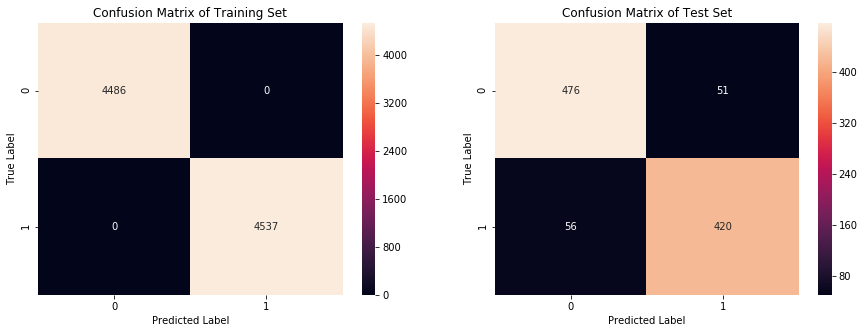

Accuracy Score of Training Set: 1.0
Accuracy Score of Test Set: 0.8933200398803589


In [22]:
# create heatmap of confusion matrix
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_train, predict_train), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(Y_test, predict_test), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Test Set')

plt.show()

# Print Accuracy Score
print('Accuracy Score of Training Set: {}'.format(accuracy_score(Y_train, predict_train)))
print('Accuracy Score of Test Set: {}'.format(accuracy_score(Y_test, predict_test)))

# Summary and Conclusion
This drill was an excellent example of the effects of increasing the accuracy of a gradient boosting model has on the overfitment of the model. Model 5 was the best performing model, but it came at the cost of overfitment. It was a good experience to find the hyperparameters of a model based on specific results ie. least overfitted, and how to optimize that search to take the least amount of time.